=== BASIC DATA INSPECTION ===

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3480 non-null   int64 
 1   Property Name      3480 non-null   object
 2   Price              3480 non-null   int64 
 3   House Type         3480 non-null   object
 4   Area in sq ft      3480 non-null   int64 
 5   No. of Bedrooms    3480 non-null   int64 
 6   No. of Bathrooms   3480 non-null   int64 
 7   No. of Receptions  3480 non-null   int64 
 8   Location           2518 non-null   object
 9   City/County        3480 non-null   object
 10  Postal Code        3480 non-null   object
dtypes: int64(6), object(5)
memory usage: 299.2+ KB
None

Descriptive Statistics:
        Unnamed: 0         Price  Area in sq ft  No. of Bedrooms  \
count  3480.000000  3.480000e+03    3480.000000      3480.000000   
mean   1739.500000  1.

<Figure size 1200x600 with 0 Axes>

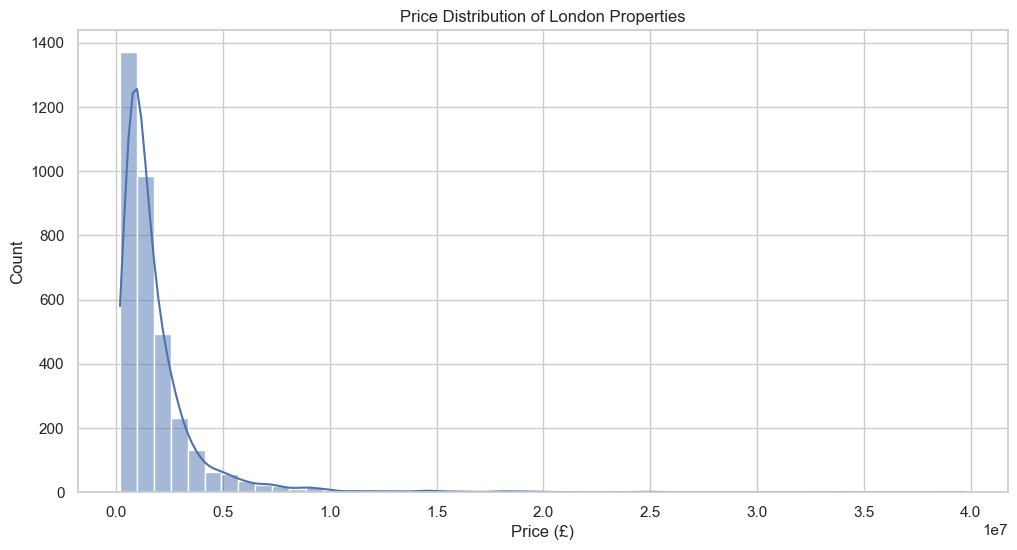


Top 10 Most Expensive Properties:
                            Property Name     Price        House Type  \
1851                No.1 Grosvenor Square  39750000   New development   
3352                        Cadogan Place  34000000             House   
3420                     Hamilton Terrace  25000000             House   
3434                           Park Place  25000000   New development   
3306                          Ikins House  23950000   New development   
3449                         Cheval House  21000000         Penthouse   
3473                            Park Lane  19950000  Flat / Apartment   
2789                          Pont Street  19450000  Flat / Apartment   
3299  Wilton Crescent &  Kinnerton Street  19000000             House   
3218                     Grosvenor Square  18950000  Flat / Apartment   

      Area in sq ft  
1851           5623  
3352           7798  
3420          12435  
3434           8356  
3306          15405  
3449           5417  
3473   

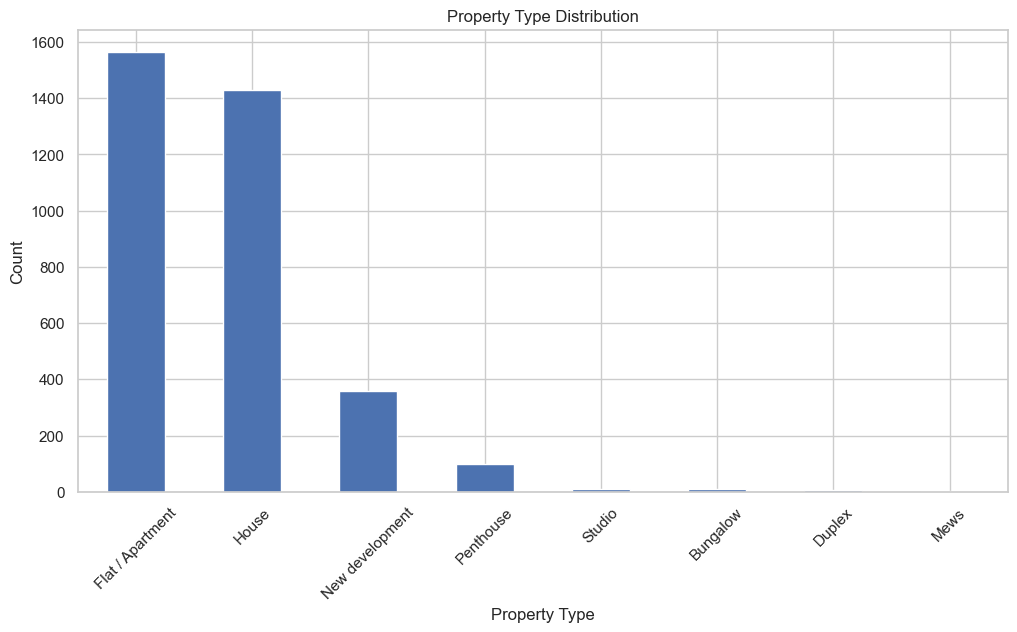


Average Price by Property Type:
House Type
Penthouse           3.112847e+06
House               2.388378e+06
New development     2.186312e+06
Mews                1.400000e+06
Flat / Apartment    1.251813e+06
Duplex              9.342857e+05
Bungalow            9.044444e+05
Studio              3.575000e+05
Name: Price, dtype: float64

=== AREA ANALYSIS ===


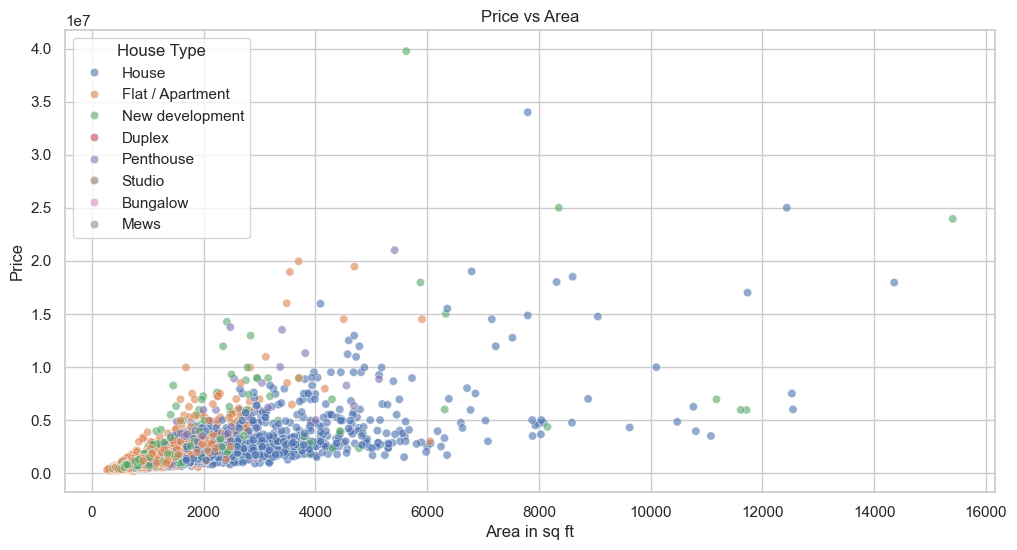


Average Price per sq ft by Property Type:
House Type
Penthouse           1497.565958
New development     1303.231908
Mews                1142.130757
Flat / Apartment    1117.752286
Studio               931.634764
House                925.804747
Duplex               797.078973
Bungalow             574.975038
Name: Price per sq ft, dtype: float64

=== LOCATION ANALYSIS ===

Top 10 Most Expensive Areas:
Location
Hampstead Heath        23950000.0
30 Montpelier Walk     21000000.0
25 Cork Street         13750000.0
St Johns Wood          12849975.0
Regents Park           12500000.0
Prince Consort Road    10950000.0
100 Knightsbridge       9950000.0
Cheyne Terrace          9950000.0
 St James's             9300000.0
10 Draycott Avenue      8950000.0
Name: Price, dtype: float64


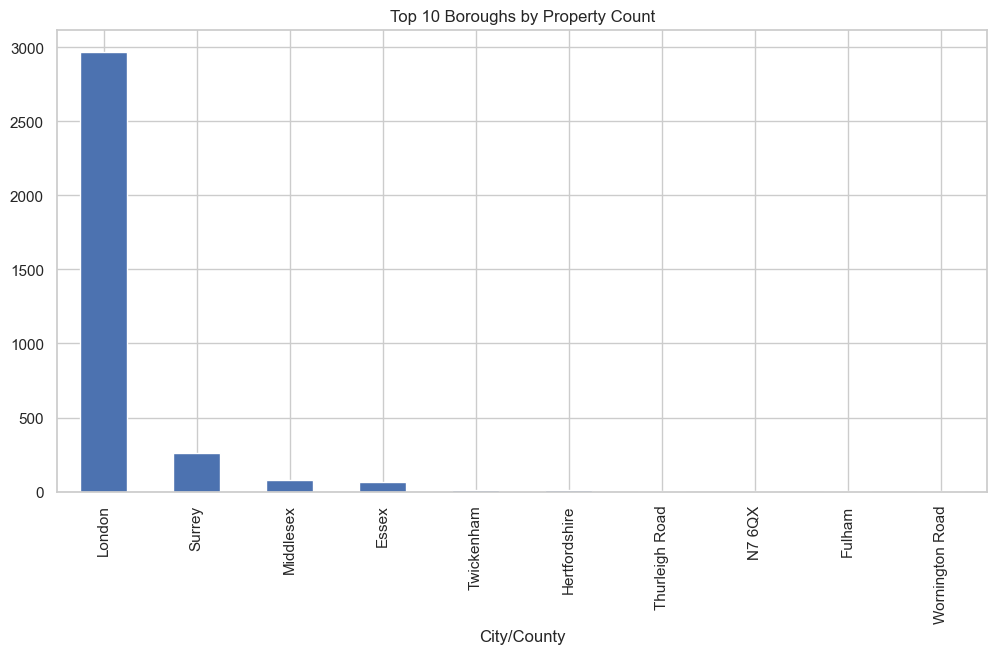


=== BEDROOM/BATHROOM ANALYSIS ===


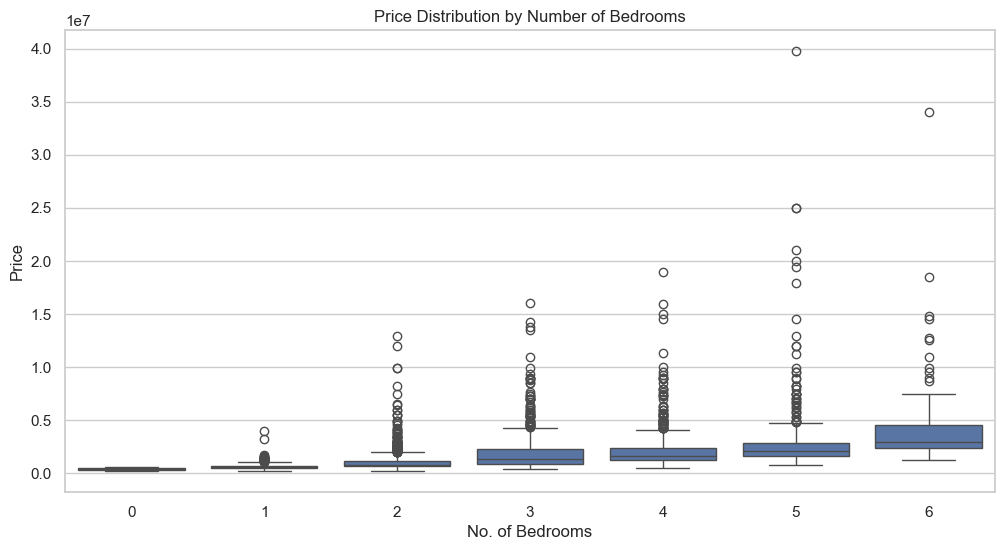


Bedroom-Bathroom Ratio Counts:
Bed-Bath Ratio
1.0    3470
Name: count, dtype: int64

=== CORRELATION ANALYSIS ===


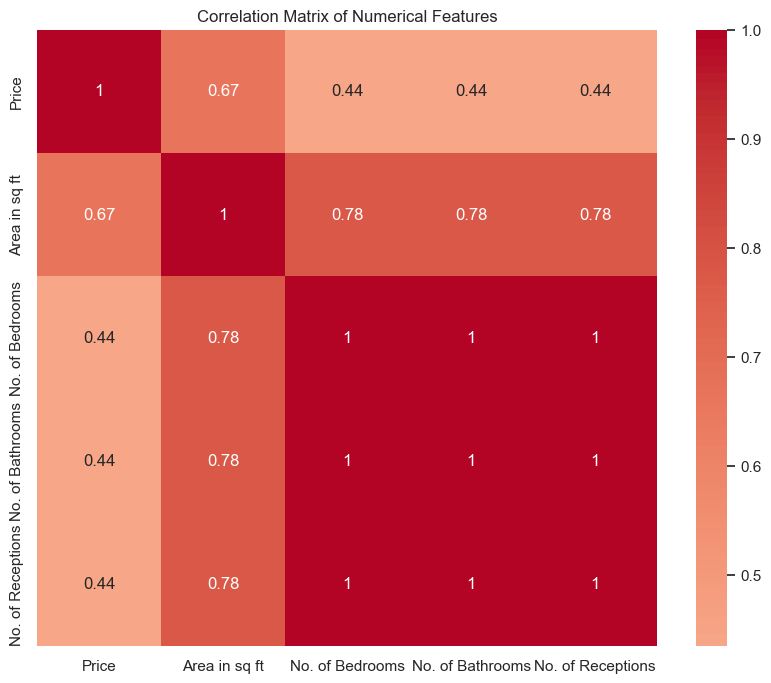


=== ADDITIONAL VISUALIZATIONS ===


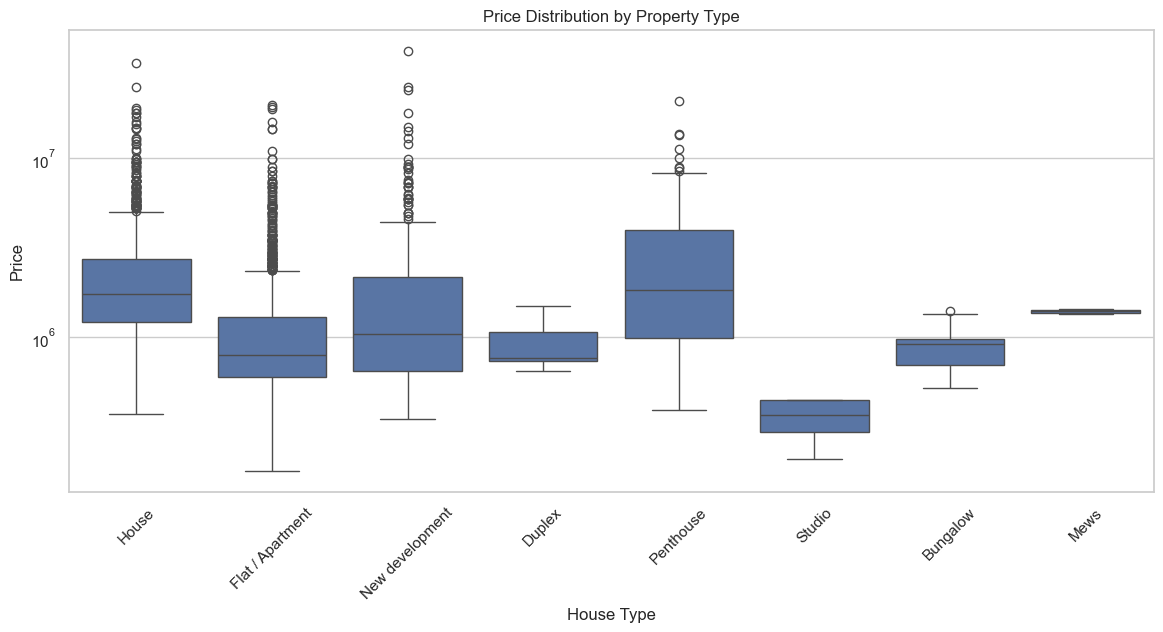

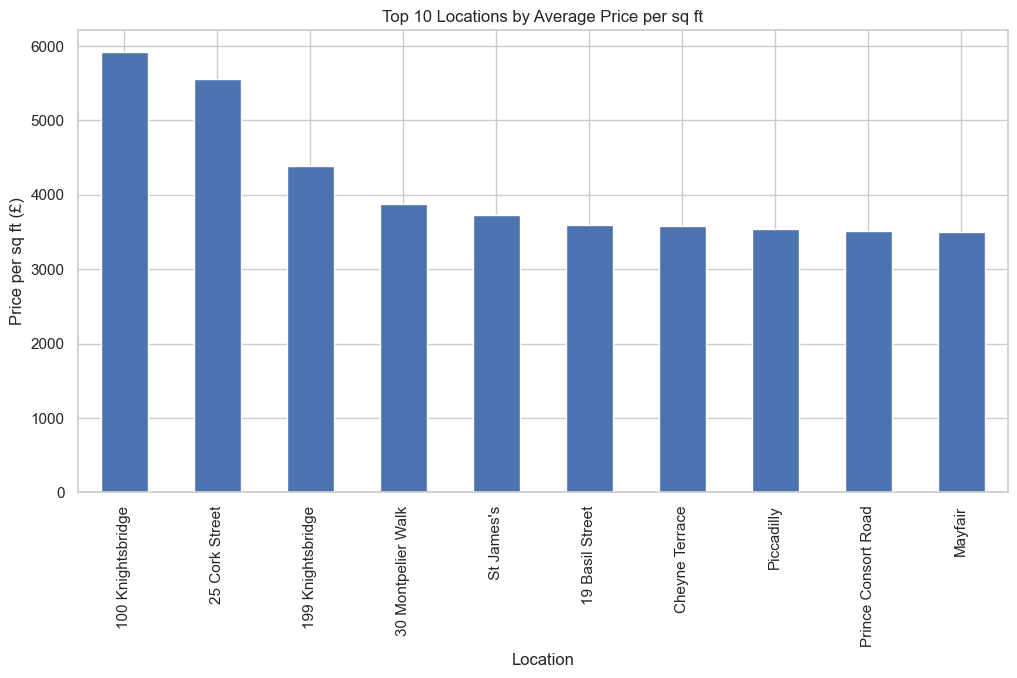


=== EDA COMPLETE ===


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
df = pd.read_csv('London.csv')

# Set style for visualizations
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# 1. Basic Data Inspection
print("=== BASIC DATA INSPECTION ===")
print("\nData Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

# 2. Price Analysis
print("\n=== PRICE ANALYSIS ===")
plt.figure(figsize=(12,6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Price Distribution of London Properties')
plt.xlabel('Price (£)')
plt.ylabel('Count')
plt.show()

print("\nTop 10 Most Expensive Properties:")
print(df.sort_values('Price', ascending=False).head(10)[['Property Name', 'Price', 'House Type', 'Area in sq ft']])

# 3. Property Type Analysis
print("\n=== PROPERTY TYPE ANALYSIS ===")
plt.figure(figsize=(12,6))
df['House Type'].value_counts().plot(kind='bar')
plt.title('Property Type Distribution')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print("\nAverage Price by Property Type:")
print(df.groupby('House Type')['Price'].mean().sort_values(ascending=False))

# 4. Area Analysis
print("\n=== AREA ANALYSIS ===")
plt.figure(figsize=(12,6))
sns.scatterplot(x='Area in sq ft', y='Price', data=df, hue='House Type', alpha=0.6)
plt.title('Price vs Area')
plt.show()

df['Price per sq ft'] = df['Price'] / df['Area in sq ft']
print("\nAverage Price per sq ft by Property Type:")
print(df.groupby('House Type')['Price per sq ft'].mean().sort_values(ascending=False))

# 5. Location Analysis
print("\n=== LOCATION ANALYSIS ===")
print("\nTop 10 Most Expensive Areas:")
print(df.groupby('Location')['Price'].mean().sort_values(ascending=False).head(10))

plt.figure(figsize=(12,6))
df['City/County'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Boroughs by Property Count')
plt.show()

# 6. Bedroom/Bathroom Analysis
print("\n=== BEDROOM/BATHROOM ANALYSIS ===")
plt.figure(figsize=(12,6))
sns.boxplot(x='No. of Bedrooms', y='Price', data=df[df['No. of Bedrooms'] <= 6])
plt.title('Price Distribution by Number of Bedrooms')
plt.show()

df['Bed-Bath Ratio'] = df['No. of Bedrooms'] / df['No. of Bathrooms']
print("\nBedroom-Bathroom Ratio Counts:")
print(df['Bed-Bath Ratio'].value_counts().head())

# 7. Correlation Analysis
print("\n=== CORRELATION ANALYSIS ===")
plt.figure(figsize=(10,8))
corr = df[['Price', 'Area in sq ft', 'No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Additional Visualizations
print("\n=== ADDITIONAL VISUALIZATIONS ===")
# Price distribution by property type
plt.figure(figsize=(14,6))
sns.boxplot(x='House Type', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution by Property Type')
plt.yscale('log')  # Using log scale for better visualization
plt.show()

# Top locations by average price per sq ft
top_locations = df.groupby('Location')['Price per sq ft'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
top_locations.plot(kind='bar')
plt.title('Top 10 Locations by Average Price per sq ft')
plt.ylabel('Price per sq ft (£)')
plt.show()

print("\n=== EDA COMPLETE ===")

In [3]:


# --- DATA CLEANING ---
df = df.drop_duplicates()

numerical_cols = ['Price', 'Area in sq ft', 'No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions']
categorical_cols = ['Property Name', 'House Type', 'Location', 'City/County', 'Postal Code']

# Imputers
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# --- FEATURE ENGINEERING ---
df['price_per_sqft'] = df['Price'] / df['Area in sq ft']
numerical_cols.append('price_per_sqft')

# Remove outliers
for col in numerical_cols:
    mean = df[col].mean()
    std = df[col].std()
    df = df[(df[col] >= mean - 3 * std) & (df[col] <= mean + 3 * std)]

# Drop rows with missing target
df = df.dropna(subset=['Price'])

# Features and target
target = 'Price'
X = df.drop(columns=[target])
y = df[target]

# Updated columns
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([('imputer', num_imputer), ('scaler', StandardScaler())]), numerical_cols),
    ('cat', Pipeline([('imputer', cat_imputer), ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]), categorical_cols)
])

# --- DATA SPLITTING ---
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

# --- MODELING ---
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# --- EVALUATION FUNCTION ---
def evaluate_model(name, model, X_val, y_val):
    y_pred = model.predict(X_val)
    print(f'\n{name} Evaluation:')
    print(f'MAE : {mean_absolute_error(y_val, y_pred):.2f}')
    print(f'MSE : {mean_squared_error(y_val, y_pred):.2f}')
    print(f'RMSE: {mean_squared_error(y_val, y_pred, squared=False):.2f}')
    print(f'R²  : {r2_score(y_val, y_pred):.4f}')

# --- TRAIN AND EVALUATE ---
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    evaluate_model(name, model, X_val_processed, y_val)

# --- HYPERPARAMETER TUNING (Random Forest) ---
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

rf_search.fit(X_train_processed, y_train)
best_rf = rf_search.best_estimator_
evaluate_model('RandomForest (Tuned)', best_rf, X_val_processed, y_val)



LinearRegression Evaluation:
MAE : 6615601220937823.00
MSE : 513971623062453223137586347769856.00
RMSE: 22670942262342192.00
R²  : -422441774233396183040.0000


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Ridge Evaluation:
MAE : 219228.43
MSE : 119673644597.50
RMSE: 345938.79
R²  : 0.9016


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.652e+12, tolerance: 3.077e+11
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Lasso Evaluation:
MAE : 226340.54
MSE : 136783941304.70
RMSE: 369843.13
R²  : 0.8876

DecisionTree Evaluation:
MAE : 64222.64
MSE : 17428950636.63
RMSE: 132018.75
R²  : 0.9857


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



RandomForest Evaluation:
MAE : 29278.29
MSE : 4761989476.21
RMSE: 69007.17
R²  : 0.9961


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



XGBoost Evaluation:
MAE : 34128.49
MSE : 3957433965.54
RMSE: 62908.14
R²  : 0.9967


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



RandomForest (Tuned) Evaluation:
MAE : 30375.83
MSE : 5113874814.82
RMSE: 71511.36
R²  : 0.9958


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
